1. Load the embeddings (npy)

In [2]:
import numpy as np

embeddings = np.load("/home/serramelendezcsm/RA/Avoidome/processed_data/embeddings.npy")
print(embeddings.shape)   # Check dimensions (51, 1280)
print(embeddings.dtype)   # Check data type (float32)

(51, 1280)
float32


In [3]:
print(embeddings[0])

[-0.02037289 -0.09056201 -0.07410281 ... -0.12021445 -0.0453266
  0.11133014]


ESM protein embeddings with shape (51, 1280).  
51 proteins
Each represented by a 1280-dimensional embedding 

? These embeddings are probably averaged over residues (as ESM outputs per-residue embeddings, typically 1280-dim for esm1b) 



2. Visualize 

Computing UMAP...


/home/serramelendezcsm/.local/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Computing t-SNE...


/home/serramelendezcsm/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


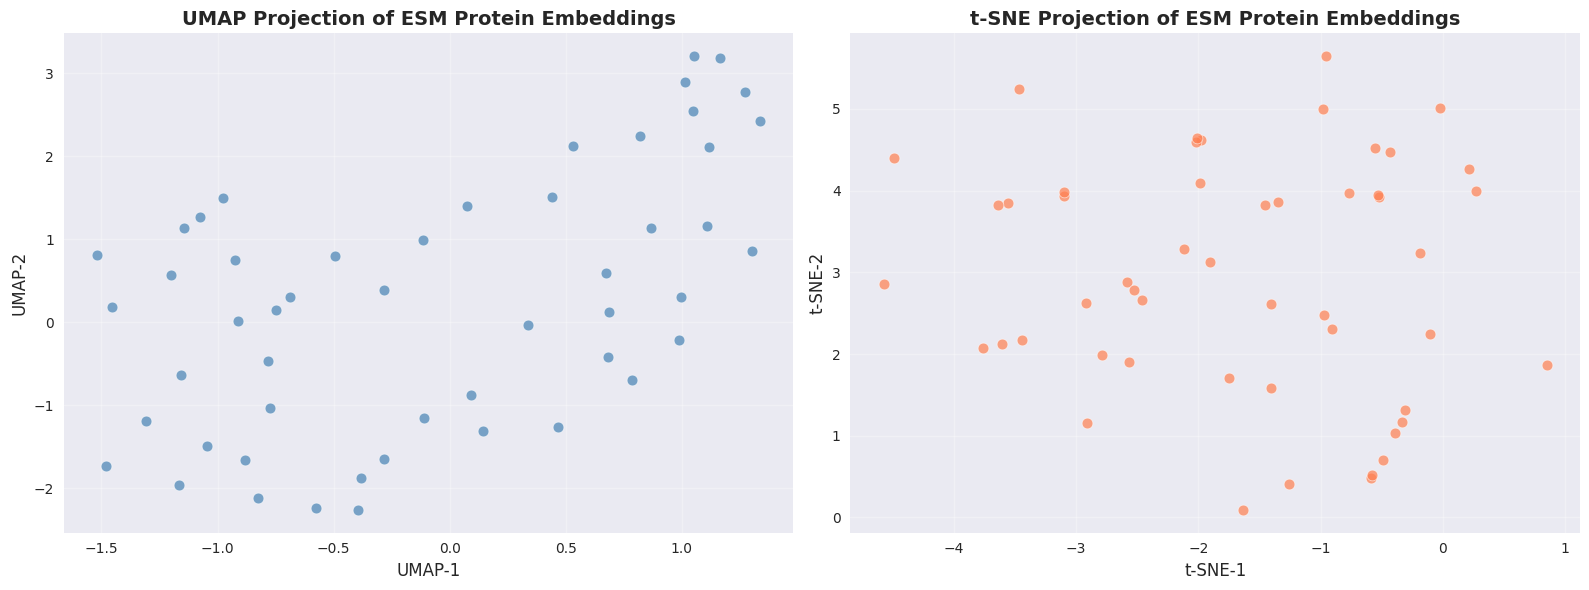

In [4]:
# Enhanced UMAP and t-SNE visualization with analysis
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import umap
import numpy as np  

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Standardize the embeddings for better visualization
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Create figure with subplots for UMAP and t-SNE
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. UMAP Visualization
print("Computing UMAP...")
reducer_umap = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
embeddings_umap = reducer_umap.fit_transform(embeddings_scaled)

axes[0].scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], 
                alpha=0.7, s=60, c='steelblue', edgecolors='white', linewidth=0.5)
axes[0].set_title("UMAP Projection of ESM Protein Embeddings", fontsize=14, fontweight='bold')
axes[0].set_xlabel("UMAP-1", fontsize=12)
axes[0].set_ylabel("UMAP-2", fontsize=12)
axes[0].grid(True, alpha=0.3)

# 2. t-SNE Visualization
print("Computing t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embeddings)-1), n_iter=1000)
embeddings_tsne = tsne.fit_transform(embeddings_scaled)

axes[1].scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], 
                alpha=0.7, s=60, c='coral', edgecolors='white', linewidth=0.5)
axes[1].set_title("t-SNE Projection of ESM Protein Embeddings", fontsize=14, fontweight='bold')
axes[1].set_xlabel("t-SNE-1", fontsize=12)
axes[1].set_ylabel("t-SNE-2", fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()